# [TEMPLATE] DATASET DEPURADO

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [3]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

<hr>

# Correlacion: Precio en funcion de Metros

- **Categoria:** `metrostotales` y `metroscubiertos`.
- **Objetivo:** Investigar la influencia que tienen los metros totales y cubiertos de la propiedad por sobre el precio.

In [28]:
# Colores a utilizar

amarillo = '#FCAA67'
rojo = '#B0413E'
verde = '#FFFFC7'
azul = '#548687'
marron = '#473335'

In [29]:
mts = df.copy()

In [30]:
mts = mts.loc[(df['metrostotales'] != -1) & (df['metroscubiertos'] != -1)][['id', 'tipodepropiedad', 'metroscubiertos', 'metrostotales', 'precio']]

In [31]:
mts.head()

,id,tipodepropiedad,metroscubiertos,metrostotales,precio
0,254099,Apartamento,80,80,2273000
1,53461,Casa en condominio,268,180,3600000
2,247984,Casa,144,166,1200000
3,209067,Casa,63,67,650000
4,185997,Apartamento,95,95,1150000


In [32]:
mts = mts.loc[(mts['metroscubiertos']<=mts['metrostotales'])]

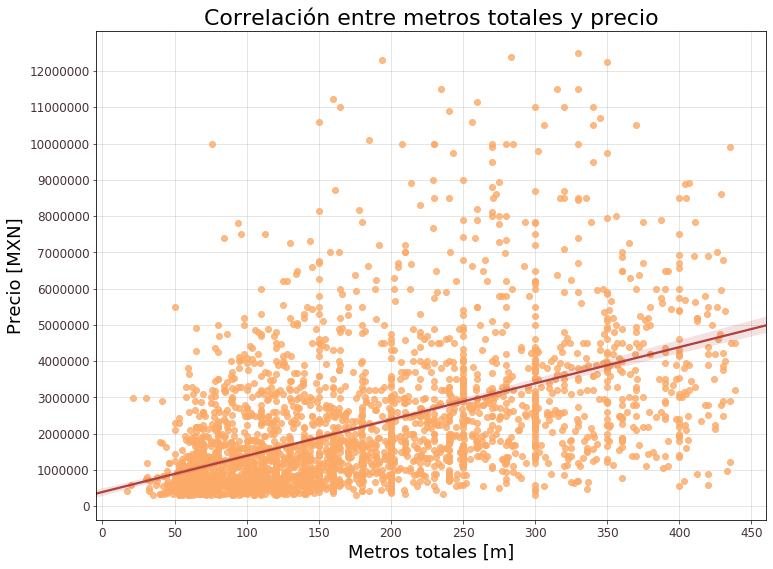

In [36]:
#config
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(12,9))
plt.ticklabel_format(style='plain')


#tomamos un sample para graficar:
sample = mts.sample(frac=0.03)

g = sns.regplot(x="metrostotales", y="precio", data=sample,
               line_kws={'color': rojo},
               scatter_kws={'color': amarillo})
g.set_title("Correlación entre metros totales y precio", fontsize=22)
g.set_ylabel("Precio [MXN]",fontsize=18)
g.set_xlabel("Metros totales [m]", fontsize=18)

plt.xticks(np.arange(0, 500, step=50))
plt.yticks(np.arange(0, 13000000, step=1000000))

plt.grid(True)
plt.tick_params(colors=marron, grid_alpha=0.4, labelsize=12)

g.figure.savefig("correlacion precio y metros totales.png", transparent=True, bbox_inches='tight')

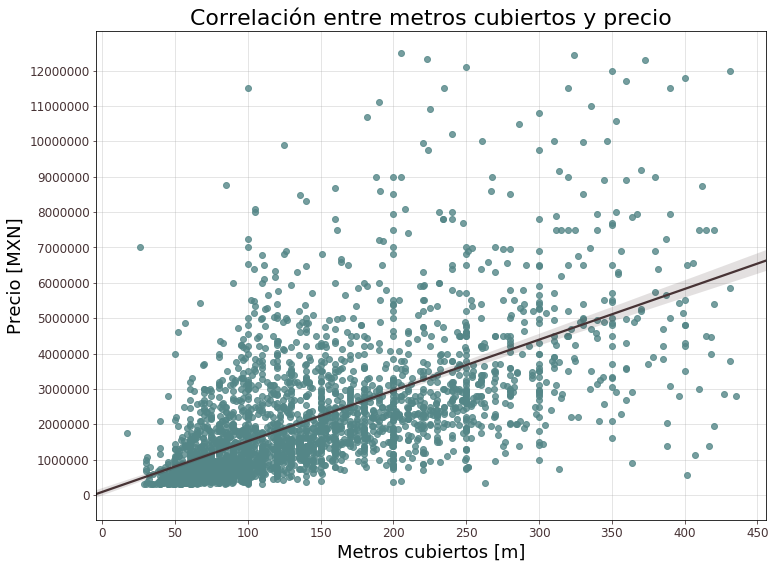

In [35]:
#config
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(12,9))
plt.ticklabel_format(style='plain')


g = sns.regplot(x="metroscubiertos", y="precio", data=sample,
               line_kws={'color': marron},
               scatter_kws={'color': azul});
g.set_title("Correlación entre metros cubiertos y precio", fontsize=22)
g.set_ylabel("Precio [MXN]",fontsize=18)
g.set_xlabel("Metros cubiertos [m]", fontsize=18)

plt.xticks(np.arange(0, 500, step=50))
plt.yticks(np.arange(0, 13000000, step=1000000))

plt.grid(True)
plt.tick_params(colors=marron, grid_alpha=0.4, labelsize=12)

g.figure.savefig("correlacion precio y metros cubiertos.png", transparent=True, bbox_inches='tight')